In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)



In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
## When is the last 12 months?
latestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The lastest date in the data is {latestdate[0]}")

# Calculate the date 1 year ago from the last data point in the database
late_date = dt.datetime.strptime(latestdate[0], "%Y-%m-%d")
one_year_ago = dt.date(late_date.year-1, late_date.month, late_date.day)
print(f"Date one year ago from the latest date is {one_year_ago}")

# Perform a query to retrieve the data and precipitation scores
query_scores = [Measurement.date, Measurement.prcp]
data = session.query(*query_scores).filter(Measurement.date>=one_year_ago).all()

# Save the query results as a Pandas DataFrame 
df = pd.DataFrame(data, columns = ["Date", "Precipitation"])

# Sort the dataframe by date and set the index to the date column
df = df.dropna(how = "any").sort_values(["Date"],ascending = True).set_index("Date")
df.head()



The lastest date in the data is 2017-08-23
Date one year ago from the latest date is 2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


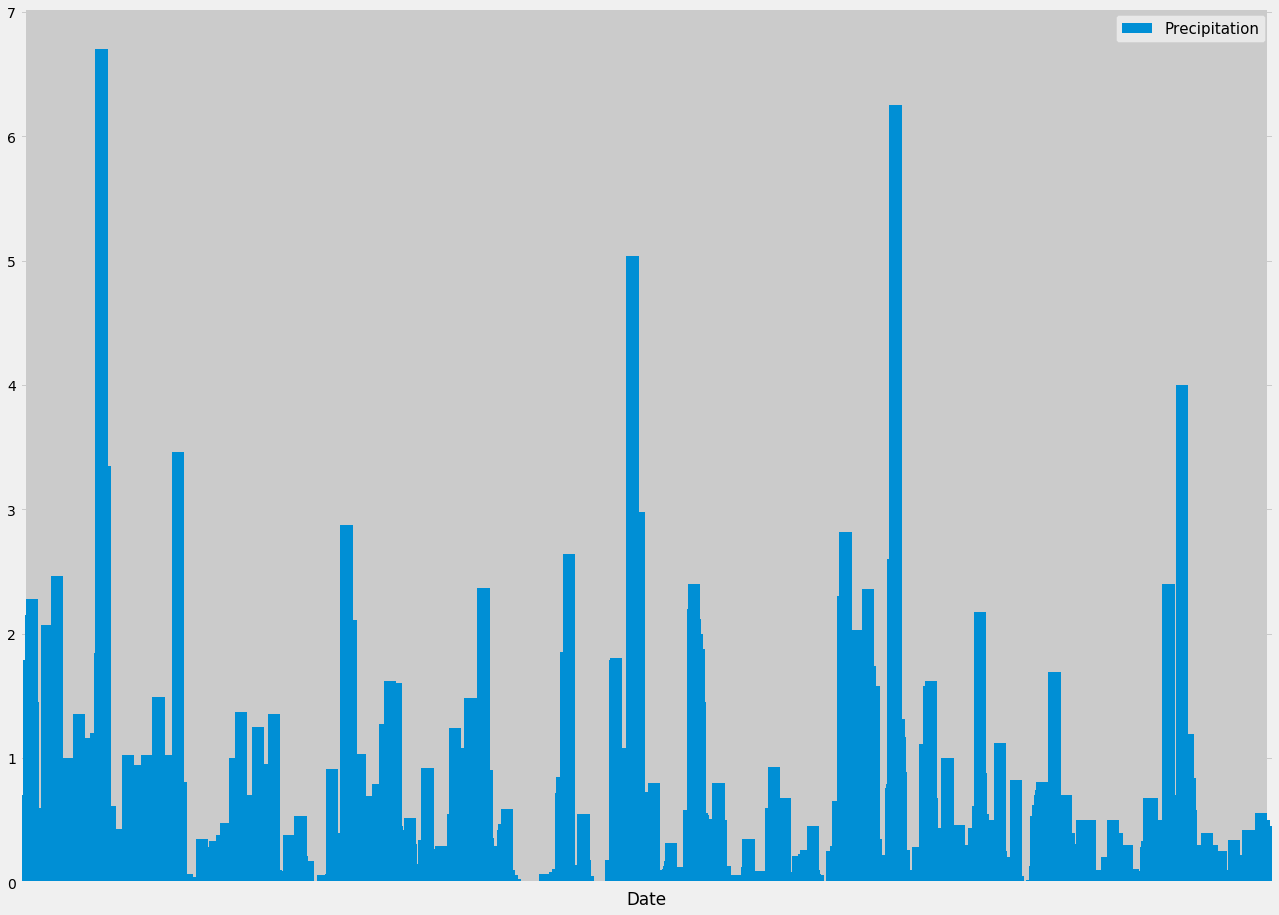

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
bar = df.plot.bar(figsize = (20,15), width=20)
bar.set_xticklabels([])
plt.legend(['Precipitation'], fontsize =15)
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {stations_count} stations uniquely")

There are 9 stations uniquely


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_rows = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc())[0]
print(f"The most active station is {most_rows[0]} with {most_rows[1]} counts")

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()

The most active station is USC00519281 with 2772 counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_rows[0]).all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_rows[0]).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_rows[0]).all()

print(f"For station id {most_rows[0]}, lowest temperature is {min_temp[0]},\
highest temperature is {max_temp[0]}, average temperature is {avg_temp[0]}")

For station id USC00519281, lowest temperature is (54.0,),highest temperature is (85.0,), average temperature is (71.66378066378067,)


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
high_numb = session.query(Measurement.tobs).filter(Measurement.station == most_rows[0]).\
    filter(Measurement.date >= one_year_ago).all()

df_high = pd.DataFrame(high_numb, columns=["Temperature"])
df_high.head()


,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


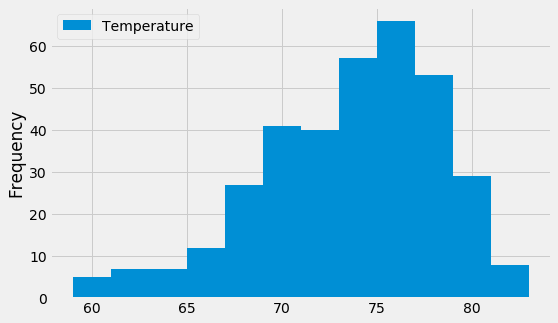

In [47]:
#plot the results as a histogram
bar_temp = df_high.plot.hist(figsize=(8,5),bins=12)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
